<a href="https://colab.research.google.com/github/danielgarciamna/cienciadedatos/blob/master/Actividad6FE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 6**
Ingeniería de características (FE)

---

*   NOMBRE: ---------------------------------------------------------
*   MATRÍCULA: ----------------------------------------------------

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 6"
os.chdir(DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
df = pd.read_csv('vehicles.csv')

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [35]:
cars_df=df

In [36]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

# **Parte 1**. Preprocesamiento

1a)    Elimina las columnas que no serán relevantes para esta actividad: `id`, `VIN`, `url`, `image_url`, `description`, `posting_date`, `lat`, `long`.


In [37]:
deleted_columns= ['id', 'VIN', 'url', 'image_url', 'description', 'posting_date', 'lat', 'long']
cars_df=cars_df.drop(columns=deleted_columns, axis=1)

In [38]:
cars_df

,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,county,state
0,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN,NaN,wy
426876,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red,NaN,wy
426877,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white,NaN,wy
426878,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,NaN,wy


1b) Almacena en una variable la cantidad de observaciones o registros del dataframe y en otra el número de columnas (después del borrado) para análisis posteriores.

In [39]:
total_observations= cars_df.shape[0]
total_columns= cars_df.shape[1]
print(f'Total de observaciones: {total_observations}')
print(f'Total de columnas: {total_columns}')

Total de observaciones: 426880
Total de columnas: 18


## Valores faltantes

Cuando la cantidad de valores faltantes en una columna es lo suficientemente grande (aproximadamente más del 25%), estimar e ingresar los valores faltantes no tiene sentido, y eliminar el atributo es mejor que estimar los valores faltantes. https://learning.oreilly.com/library/view/hands-on-data-preprocessing/9781801072137/B17397_11_Final_NM_ePub.xhtml#_idParaDest-188

Sin embargo, esto no es una regla aplicable a todos los escenarios y hay muchas discusiones en torno a ello. https://www.quora.com/How-much-missing-data-is-too-much-1

Para esta actividad  utilizaremos un umbral de 0.70 de la cantidad de registros (aquellas columnas que tengan 70% de valores no nulos). Considera además que estamos asumiendo que dichas variables son MCAR o MAR sin ninguna método gráfico o estadístico.

2a) Determina el porcentaje de valores faltantes por columna y elimina aquellas que posean el 30% o más de valores perdidos. Para ello utiliza el parámetro `thresh` de la función `dropna()` ¿Cuántas columnas se eliminaron?


In [40]:
cars_df.isna().mean()*100

,0
region,0.000000
region_url,0.000000
price,0.000000
year,0.282281
manufacturer,4.133714
model,1.236179
condition,40.785232
cylinders,41.622470
fuel,0.705819
odometer,1.030735


In [41]:
cars_df.dropna(thresh=(0.7*total_observations), axis=1,inplace= True)

In [42]:
cars_df.shape

(426880, 12)

In [43]:
cars_df.isna().mean()*100

,0
region,0.000000
region_url,0.000000
price,0.000000
year,0.282281
manufacturer,4.133714
model,1.236179
fuel,0.705819
odometer,1.030735
title_status,1.930753
transmission,0.598763


Además, cuando tenemos grandes conjuntos de datos, podemos eliminar filas que contienen valores nulos. Aunque, no se recomienda si el porcentaje de valores faltantes en el conjunto de datos es superior al 30%
https://medium.com/analytics-vidhya/how-to-deal-with-missing-values-in-data-set-8e8f70ecf155

2b) Borra los registros que contengan `NaN` en las columnas con menos del 5% de valores faltantes empleando el parámetro subset ¿Qué porcentaje de los registros iniciales se eliminaron?


In [44]:
# Identify columns with less than 5% missing values
columns_to_check = cars_df.columns[cars_df.isna().mean() < 0.05]

# Calculate the number of initial observations
initial_observations = cars_df.shape[0]

# Drop rows with NaN in the specified columns
cars_df.dropna(subset=columns_to_check, inplace=True)

# Calculate the number of remaining observations
remaining_observations = cars_df.shape[0]

# Calculate the percentage of removed observations
removed_percentage = ((initial_observations - remaining_observations) / initial_observations) * 100

# Print the result
print(f"Percentage of removed observations: {removed_percentage:.2f}%")


Percentage of removed observations: 8.73%


In [45]:
print(f'Porcentaje de filas eliminadas: {round((1-cars_df.shape[0]/total_observations)*100,2)}%')
print(f'Porcentaje de columnas eliminadas: {round((1-cars_df.shape[1]/total_columns)*100,2)}%')

Porcentaje de filas eliminadas: 8.73%
Porcentaje de columnas eliminadas: 33.33%


2c) Si hay variables que aún poseen valores faltantes, utiliza el método de imputación apropiado (`mean, median, mode`)

In [46]:
cars_df.isna().sum()

,0
region,0
region_url,0
price,0
year,0
manufacturer,0
model,0
fuel,0
odometer,0
title_status,0
transmission,0


In [49]:
cars_df.loc[:,'type']=cars_df['type'].fillna(value=cars_df['type'].mode()[0])

In [50]:
cars_df.isna().sum()

,0
region,0
region_url,0
price,0
year,0
manufacturer,0
model,0
fuel,0
odometer,0
title_status,0
transmission,0


## Valores atípicos

3a) Obtén el histograma de las variables `price`, `year` y `odometer` para observar su distribución.

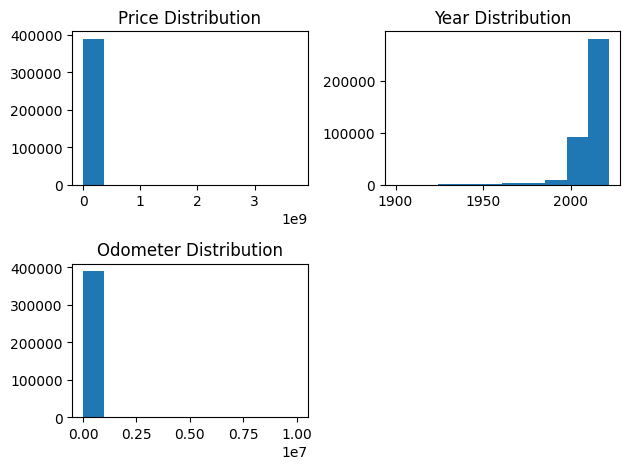

In [51]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3= fig.add_subplot(2, 2, 3)
ax1.hist(x='price', data=cars_df, bins=10)
ax1.set_title('Price Distribution')
ax2.hist(x='year', data=cars_df)
ax2.set_title('Year Distribution')
ax3.hist(x='odometer', data=cars_df)
ax3.set_title('Odometer Distribution')

plt.tight_layout()
plt.show()

3b) Añade la columna `age`, calculada a partir de `year`, para determinar los años del vehículo y una vez obtenida, elimina la columna `year`. Genera el histograma de la nueva variable.

In [52]:
cars_df['age']= 2025-cars_df['year']
cars_df.drop(columns=['year'], inplace=True)

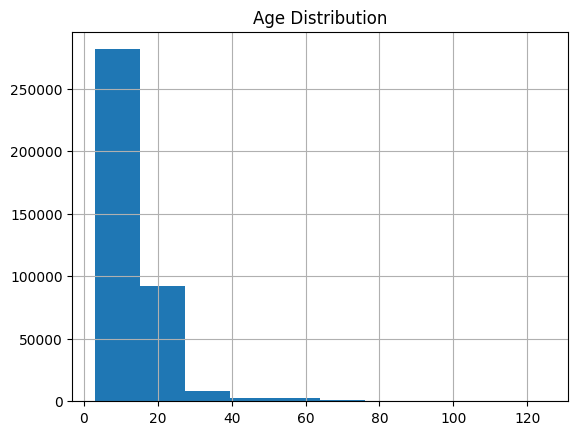

In [53]:
cars_df.age.hist()
plt.title('Age Distribution')
plt.show()

4a) Para visualizar si hay valores atípicos, genera gráficos de box plot para las tres variables (`price, age, odometer`)

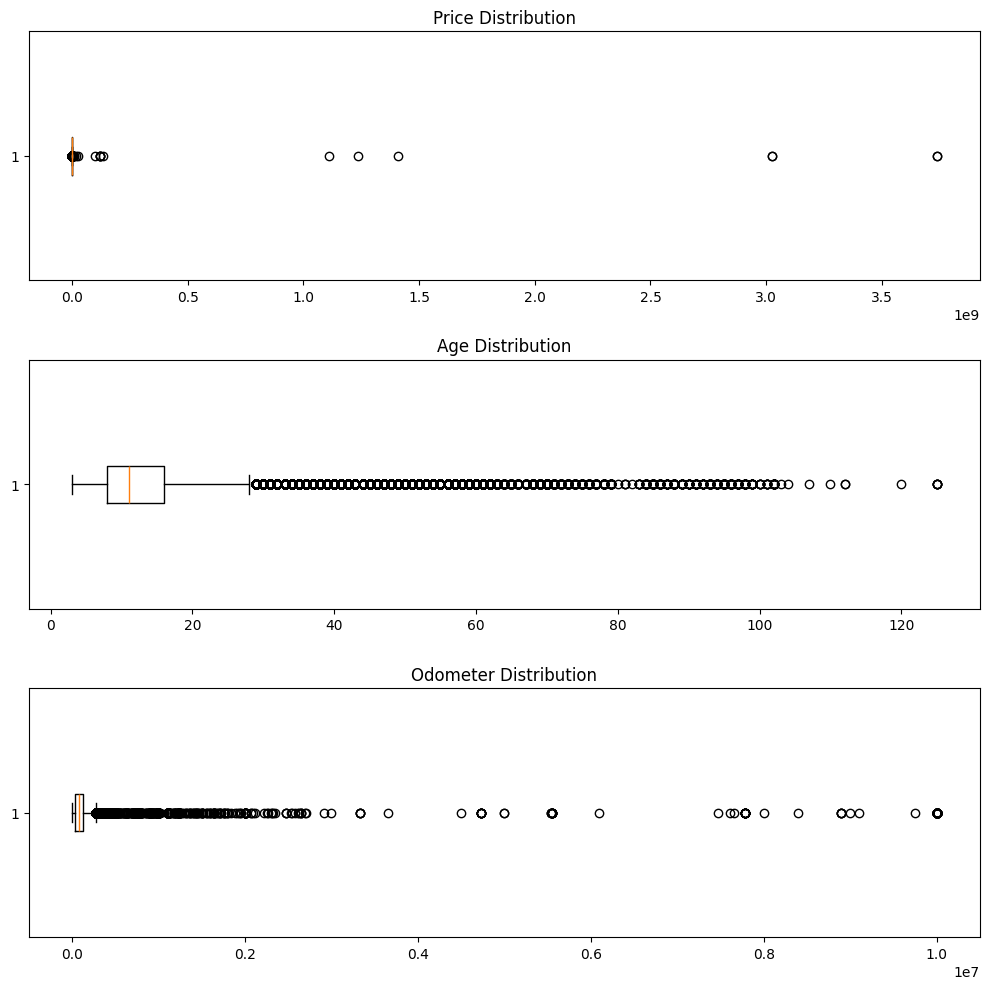

In [54]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(3,1, 1)
ax2 = fig.add_subplot(3,1, 2)
ax3= fig.add_subplot(3, 1,3)

ax1.boxplot(data=cars_df, x='price', vert=False)
ax1.set_title('Price Distribution')

ax2.boxplot(data=cars_df, x='age', vert=False)
ax2.set_title('Age Distribution')

ax3.boxplot(data=cars_df, x='odometer', vert=False)
ax3.set_title('Odometer Distribution')


plt.tight_layout()
plt.show()

Si el conjunto de outliers es “relativamente grande” (aunque sabemos que deben andar alrededor de un 5% del conjunto total de datos), realizar una investigación particular sobre ellos que permita tomar mejores decisiones.

4b) Calcula, para cada variable, el porcentaje de sus valores atípicos y elimínalos del dataframe ¿Qué porcentaje de los registros iniciales se han eliminado en total hasta ahora?

In [57]:
def detect_outliers(df,columns):
    for col in columns:
        Q1= df[col].quantile(0.25)
        Q3= df[col].quantile(0.75)
        IQR= Q3-Q1
        BM = (df[col]<(Q1-1.5*IQR)) |(df[col]>(Q3+1.5*IQR))
        outliers= df[BM]
        print(f"Hay {outliers.shape[0]} valores atípicos en la variable {col}")

In [58]:
detect_outliers(cars_df, ['price', 'age', 'odometer'])

Hay 6656 valores atípicos en la variable price
Hay 14209 valores atípicos en la variable age
Hay 3226 valores atípicos en la variable odometer


In [59]:
def delete_outliers(df, column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR= Q3-Q1
    BM = (df[column]<(Q1-1.5*IQR)) |(df[column]>(Q3+1.5*IQR))
    return df[~BM].reindex()

In [60]:
cars_df= delete_outliers(cars_df, 'age')
cars_df= delete_outliers(cars_df, 'price')
cars_df= delete_outliers(cars_df, 'odometer')

In [61]:
cars_df.shape

(366679, 12)

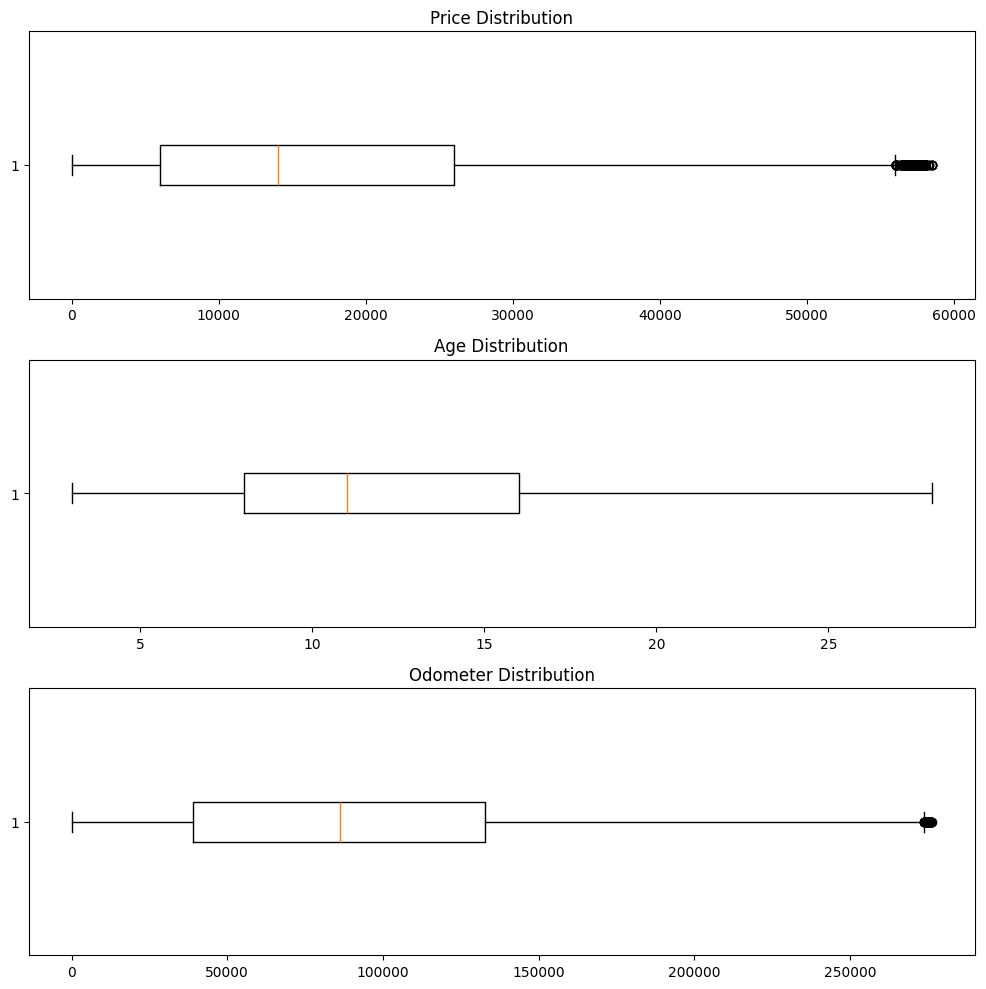

In [62]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(3,1, 1)
ax2 = fig.add_subplot(3,1, 2)
ax3= fig.add_subplot(3, 1,3)

ax1.boxplot(data=cars_df, x='price', vert=False)
ax1.set_title('Price Distribution')

ax2.boxplot(data=cars_df, x='age', vert=False)
ax2.set_title('Age Distribution')

ax3.boxplot(data=cars_df, x='odometer', vert=False)
ax3.set_title('Odometer Distribution')


plt.tight_layout()
plt.show()

4c) Dibuja nuevamente los histogramas para observar claramente el sesgo de las variables tras la eliminación de los outliers.

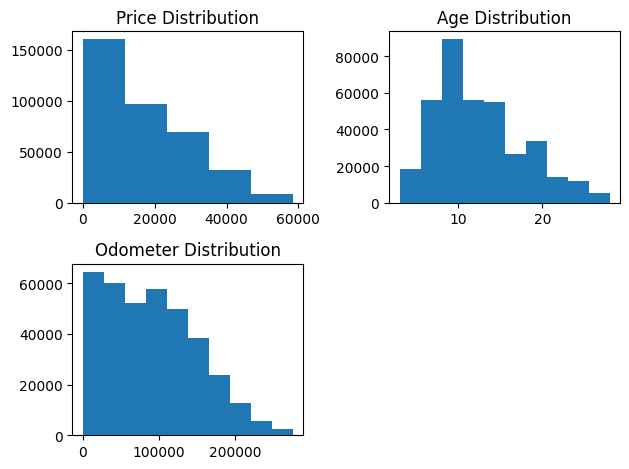

In [63]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3= fig.add_subplot(2, 2, 3)
ax1.hist(x='price', data=cars_df, bins=5)
ax1.set_title('Price Distribution')
ax2.hist(x='age', data=cars_df)
ax2.set_title('Age Distribution')
ax3.hist(x='odometer', data=cars_df)
ax3.set_title('Odometer Distribution')

plt.tight_layout()
plt.show()

# **Parte 2**. Ingeniería de características

## Transformando variables numéricas

La distribución de las variables determinará que método usar y en qué orden. Por ejemplo, en variables sesgadas se debe realizar primero la transformación  y luego el escalamiento, ya que el efecto deseado es "desinclinar" las distribuciones del eje y ese efecto se maximiza cuando aplica en el rango completo en comparación con aplicarlo en variables con una desviación estándar unitaria (por z-score) o variables en el rango [0,1] (por Min-Max).

Aplicar es escalamiento antes comprimiría la mayoría de los datos en un rango estrecho. Entonces se debe iniciar con transformar la característica en Gaussiana y luego escalarla.

5a) Genera gráficos Q-Q de las variables `price, age, odometer` para observar las diferencias entre sus distribuciones y la normal.


In [64]:
# Plot histogram and Q-Q plots to explore the variable distribution
def diagnostic_plots(df, variable):

    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable

    plt.figure(figsize=(15, 6))

    # histogram
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.title(f"Histogram of {variable}")

    # q-q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(f"Q-Q plot of {variable}")

    plt.show()


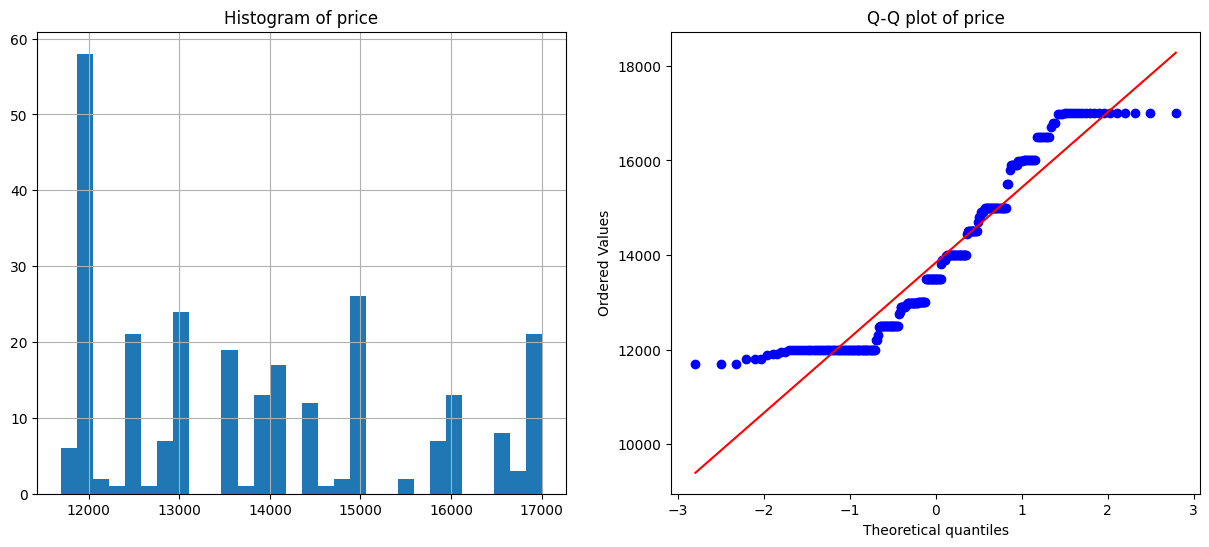

In [ ]:
diagnostic_plots(cars_df, 'price')

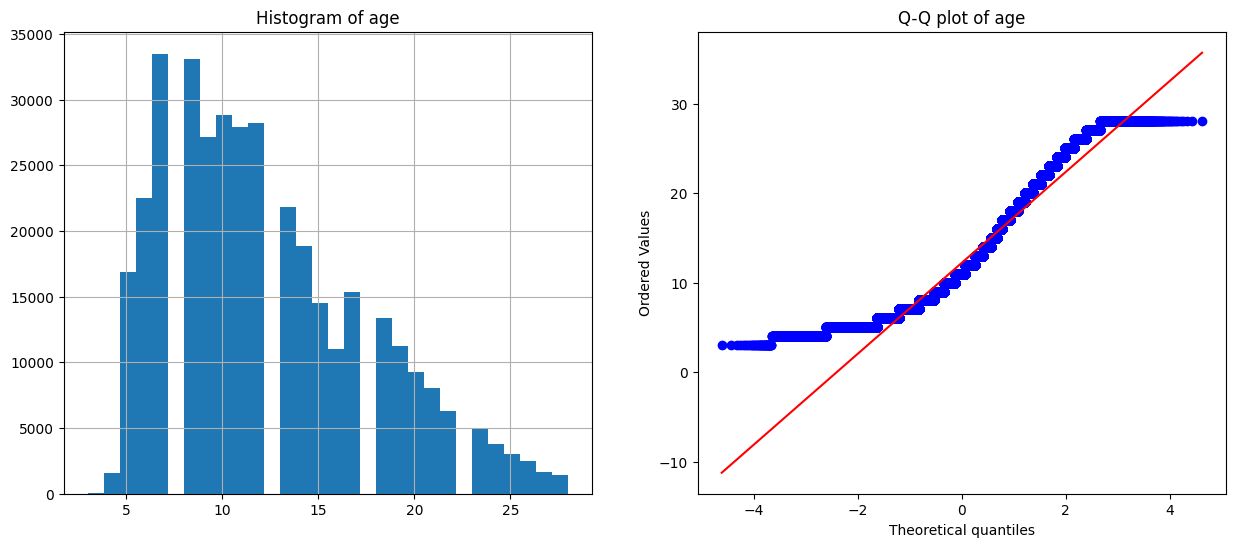

In [65]:
diagnostic_plots(cars_df, 'age')

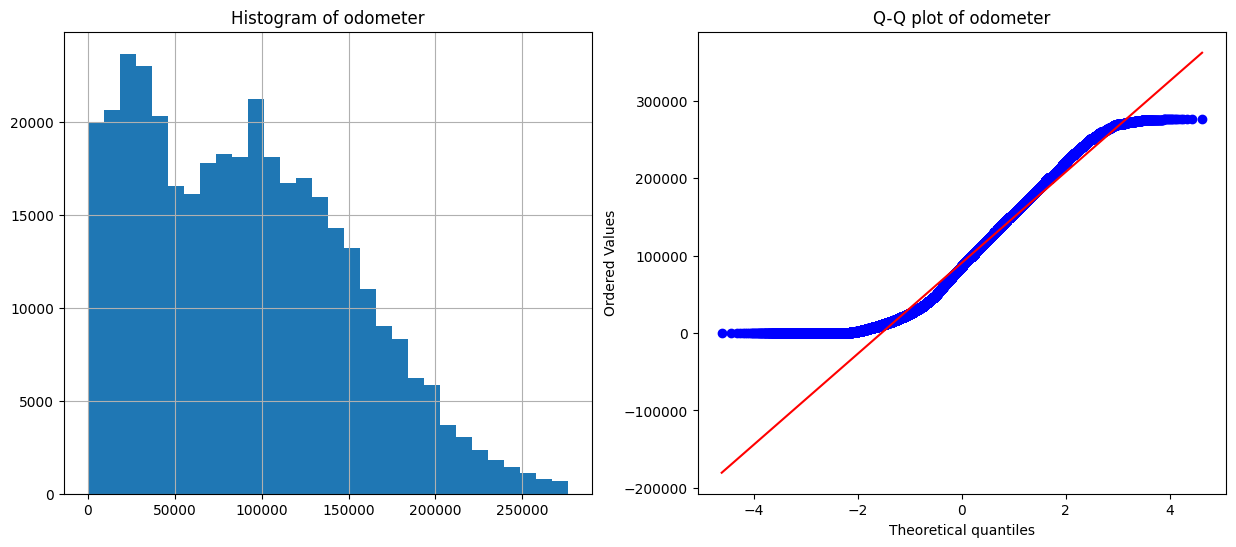

In [66]:
diagnostic_plots(cars_df, 'odometer')

Las transformaciones *Box-Cox* y *Yeo-Johnson* son generalizaciones, pues incluyen casos especiales de transformaciones: logarítmica (`λ = 0`), recíproca (`λ = -1`),  raíz cuadrada (`λ = 0.5`) y más exponentes. En *Box-Cox* se evalúan varios valores de `λ` y se selecciona aquel que arroja la mejor transformación

La transformación de *Yeo-Johnson* es una extensión de la transformación de *Box-Cox* que ya no está restringida a valores positivos. En otras palabras, la transformación de *Yeo-Johnson* se puede utilizar en variables con valores cero y negativos, así como valores positivos. Cuando la variable solo tiene valores positivos, la transformación de *Yeo-Johnson* es como la transformación de *Box-Cox* de la variable más uno.

En este caso, como las variables `price` y `odometer` tienen valores de 0, utilizaremos *Yeo-Johnson*.

Recuerda que en `PowerTransformer()` el parámetro `standardize` por defecto es `True`. Con esto, después de hacer la transformación, el resultado se escala con *Z-score*, haciendo que la media sea 0 y la desviación estándar 1. Como en el ejercicio 6 ocuparás Min-Max para escalar, haz `standardize=False` para omitir el escalamiento en esta fase.

5b) Aplica la transformación Yeo-Johnson para reducir el sesgo en estas variables. Coloca el resultado en un dataframe denominado `transf_df` que contenga sólo las variables transformadas.

In [71]:
# prompt:  Aplica la transformación Yeo-Johnson para reducir el sesgo en estas variables. Coloca el resultado en un dataframe denominado transf_df que contenga sólo las variables transformadas.

from sklearn.preprocessing import PowerTransformer

# Apply Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson', standardize=False)
transf_df = pd.DataFrame(pt.fit_transform(cars_df[['price','age', 'odometer']]), columns=['price','age', 'odometer'])


5c) Dibuja nuevamente los gráficos Q-Q y los histogramas para observar el efecto de la transformación.

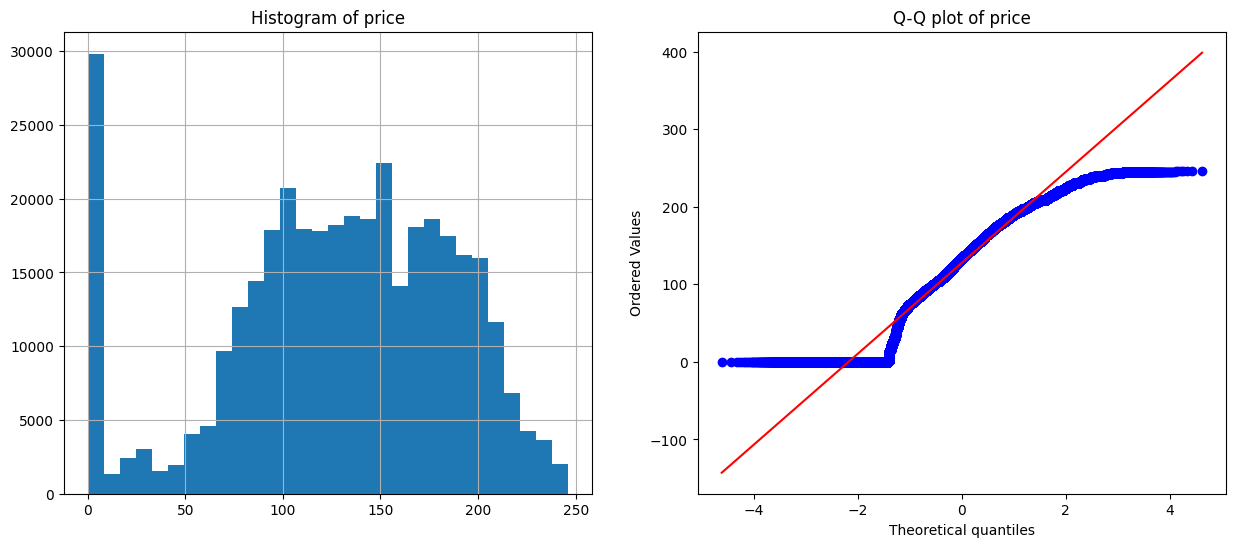

In [72]:
diagnostic_plots(transf_df, 'price')

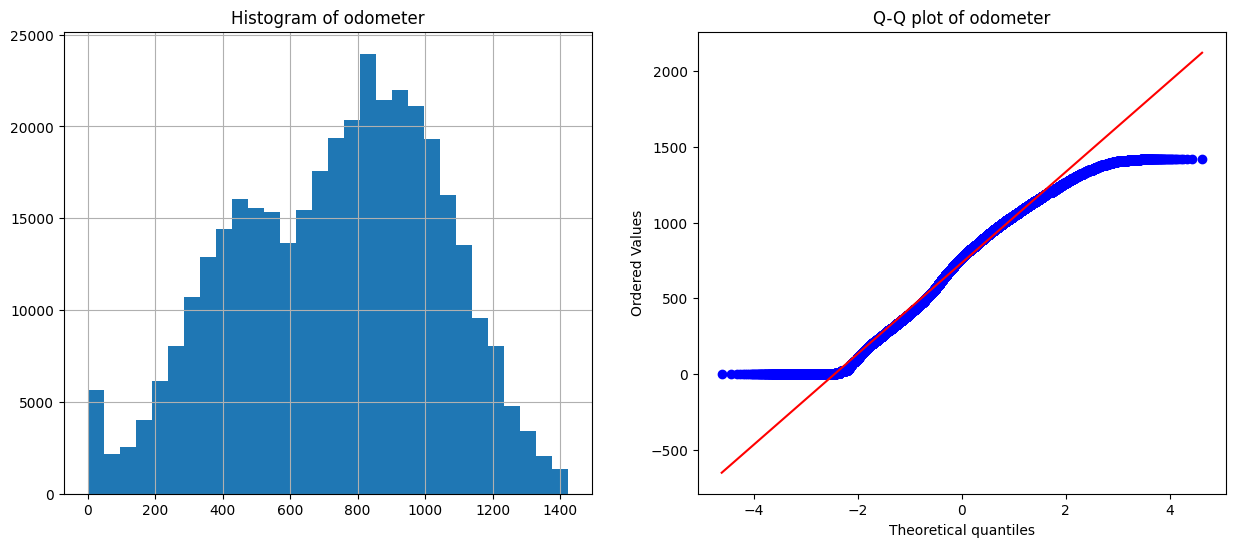

In [73]:
diagnostic_plots(transf_df, 'odometer')

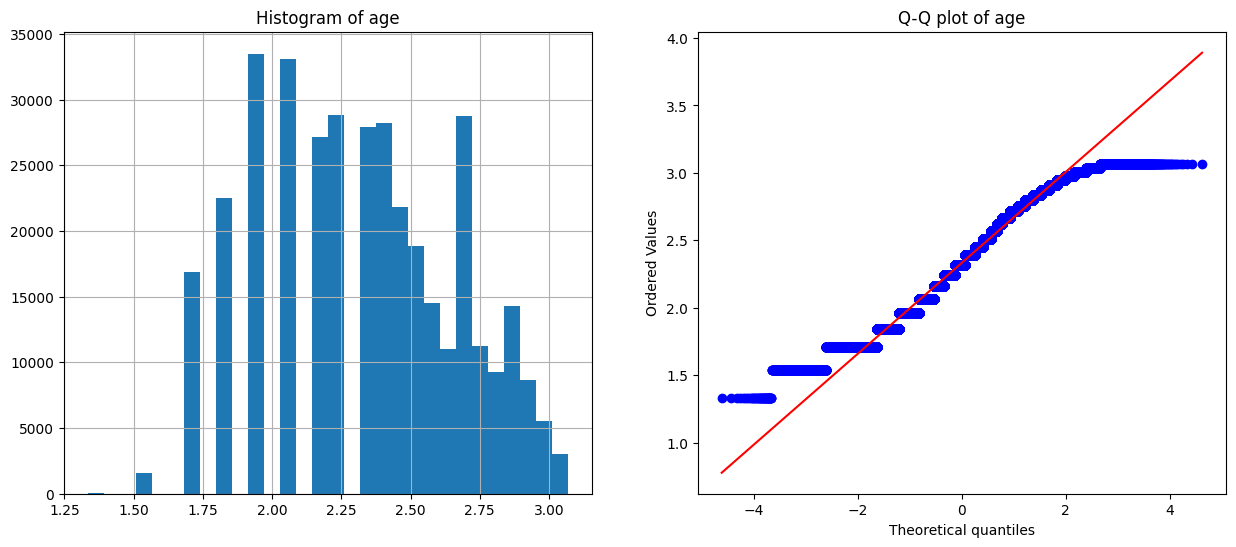

In [74]:
diagnostic_plots(transf_df, 'age')

## Escalando variables numéricas

6a) Como las tres variables poseen diferentes escalas, aplica el método Min-Max (al dataframe obtenido: `transf_df`) para que queden en el rango fijo [0 a 1]. Coloca el resultado en un dataframe denominado `minmax_df`.


In [84]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler =MinMaxScaler()
minmax_df = minmax_scaler.fit_transform(transf_df[['price', 'age', 'odometer']])
minmax_df = pd.DataFrame(minmax_df, columns=['price', 'age', 'odometer'])

6b) Dibuja nuevamente los histogramas para verificar que el escalamiento no cambia la distribución.

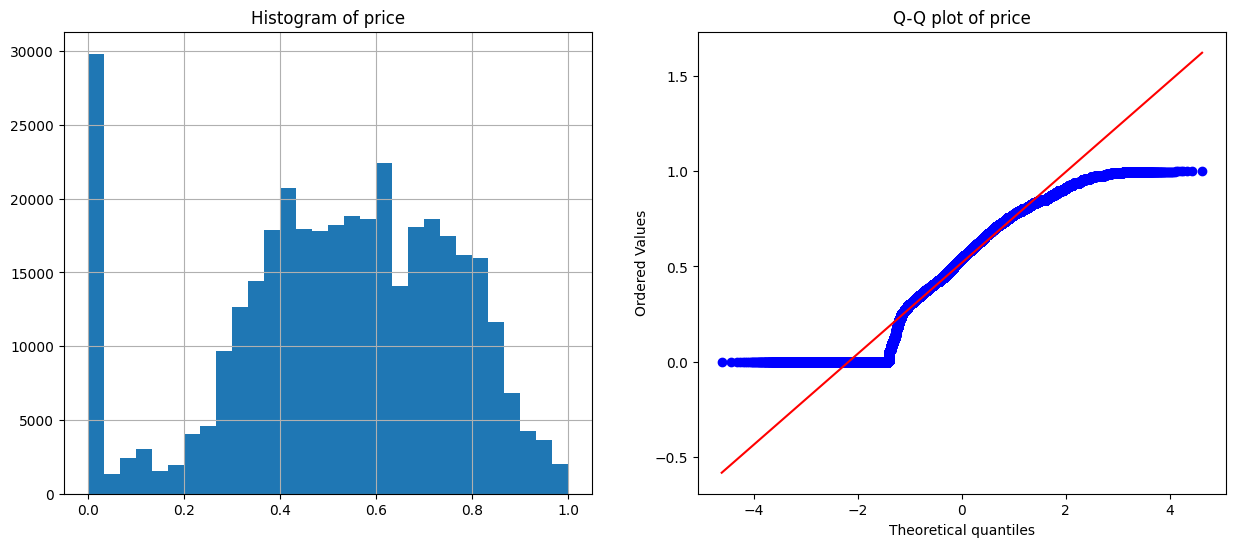

In [86]:
diagnostic_plots(minmax_df, 'price')

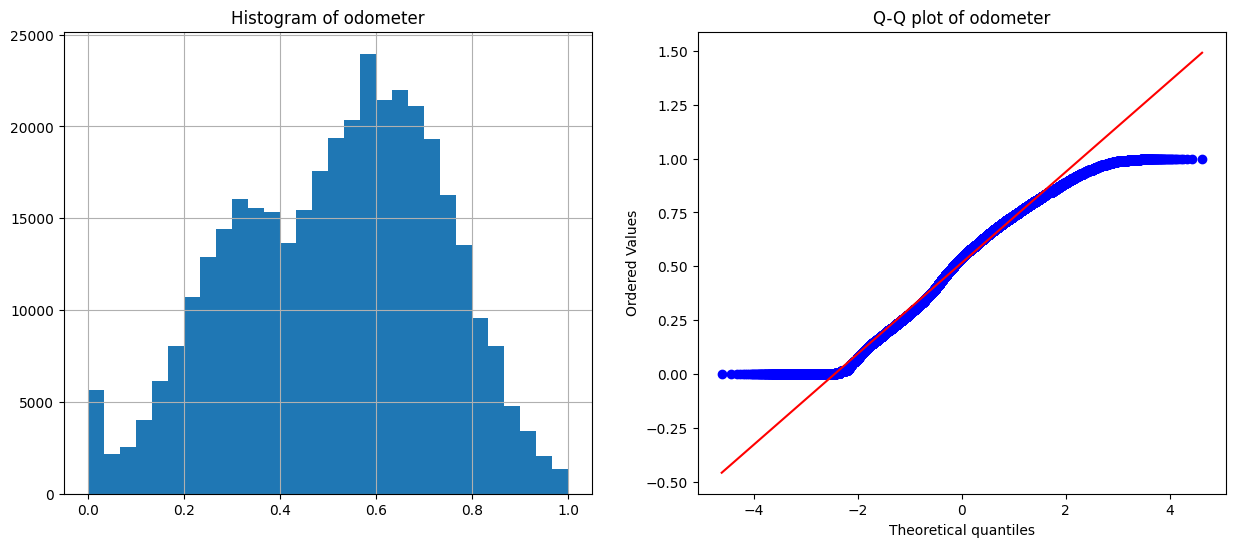

In [87]:
diagnostic_plots(minmax_df, 'odometer')

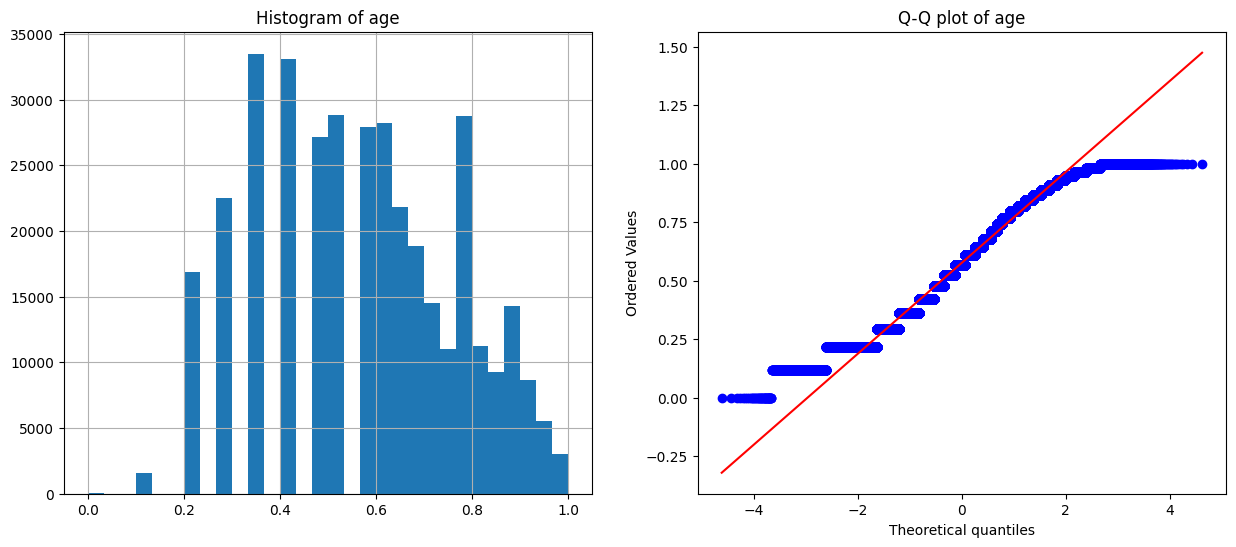

In [88]:
diagnostic_plots(minmax_df, 'age')

## Codificando variables categóricas


7a) Utiliza el método `describe()` para obtener el resumen de las estadísticas descriptivas en las variables categóricas.

In [89]:
cars_df.describe(include='object')

,region,region_url,manufacturer,model,fuel,title_status,transmission,type,state
count,366679,366679,366679,366679,366679,366679,366679,366679,366679
unique,404,413,40,19116,5,6,3,13,51
top,columbus,https://grandrapids.craigslist.org,ford,f-150,gas,clean,automatic,sedan,ca
freq,3190,2737,61758,7442,312240,355061,291920,154384,42124


7b) Según la cardinalidad observada, separa en dos listas (`highly_cardinal_variables` y `few_cardinal_variables`) los nombres de las variables con alta cardinalidad y baja cardinalidad respectivamente. Una variable es considerada de alta cardinalidad cuando tiene cientos de valores únicos.

In [100]:
highly_cardinal_variables= ['region', 'region_url', 'model']
few_cardinal_variables= ['manufacturer', 'fuel', 'title_status', 'transmission', 'type', 'state']

7c) Visualiza en gráficos de barras la frecuencias de las categorías para las variables con baja cardinalidad (en `few_cardinal_variables`)

In [107]:
def count_plot(df, columns):
  for col in columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col], hue=df[col], legend=False)
    plt.title(f'Conteo de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

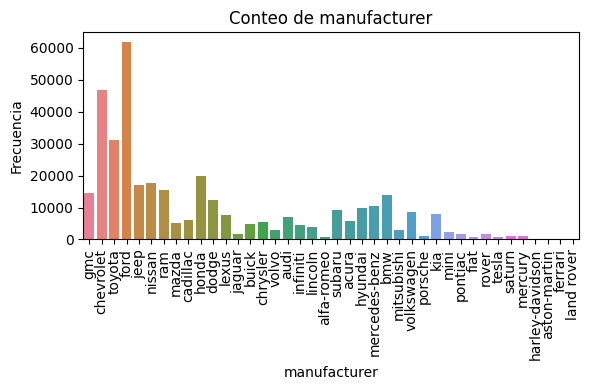

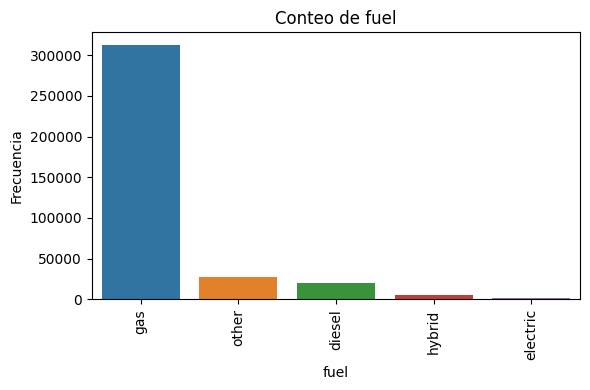

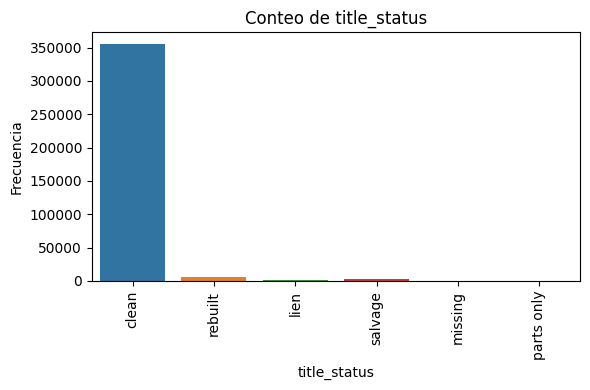

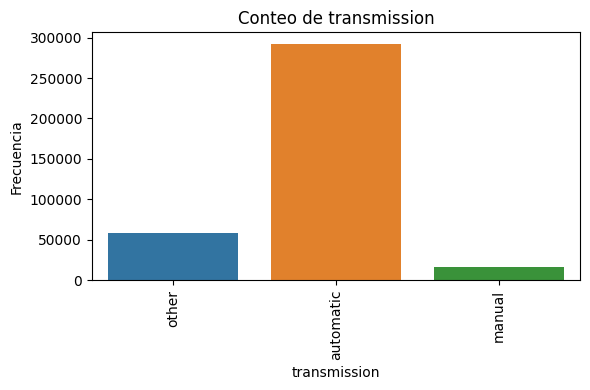

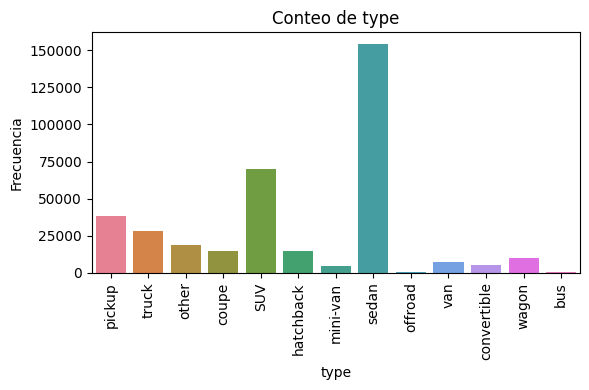

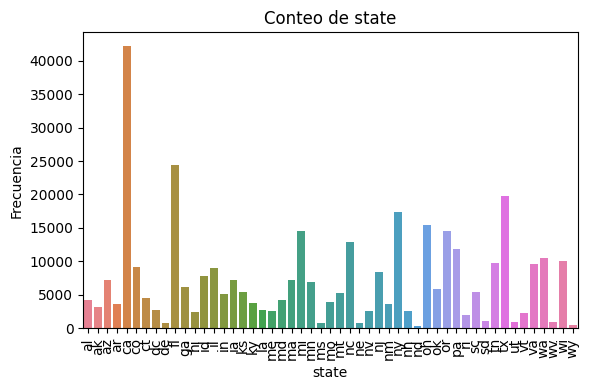

In [108]:
count_plot(cars_df, few_cardinal_variables)

8. Aplica codificación *one-hot* a las variables en `few_cardinal_variables`, borrando la primera categoría (`drop='first'`). Coloca el resultado en un dataframe denominado `onehot_df`.

In [109]:
from sklearn.preprocessing import OneHotEncoder

In [130]:
encoder= OneHotEncoder(drop='first', sparse_output=False)
onehot_df= encoder.fit_transform(cars_df[few_cardinal_variables])
onehot_df= pd.DataFrame(onehot_df, columns=encoder.get_feature_names_out(few_cardinal_variables))

In [133]:
onehot_df

,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_dodge,manufacturer_ferrari,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
366675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
366676,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
366677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


9. Aplica codificación binaria a las variables en `highly_cardinal_variables`. Coloca el resultado en un dataframe denominado `binary_df`.

In [135]:
!pip install category_encoders -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.0 MB/s eta 0:00:00


In [136]:
from category_encoders.binary import BinaryEncoder

In [137]:
encoder= BinaryEncoder()
binary_df= encoder.fit_transform(cars_df[highly_cardinal_variables])

In [138]:
binary_df

,region_0,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_url_0,...,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14
27,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
28,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
29,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
30,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
31,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,1,1,0,0,1,0,1,0,0,1,...,1,1,0,0,1,0,1,0,0,0
426876,1,1,0,0,1,0,1,0,0,1,...,0,0,0,0,1,1,0,1,1,1
426877,1,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,1,1,0,1,1
426878,1,1,0,0,1,0,1,0,0,1,...,1,1,1,0,1,1,1,1,1,1


10. Concatena los dataframes obtenidos: `minmax_df` (cuyas variables numéricas ya están transformadas y escaladas) y las codificaciones anteriores (`onehot_df` y `binary_df`). Toma en cuenta que si los índices de los dataframes no coinciden, la concatenación no se realizará correctamente. Utiliza `reset_index(drop=True, inplace=True)` para restablecer los índices.

In [139]:
minmax_df.reset_index(drop=True, inplace=True)
onehot_df.reset_index(drop=True, inplace=True)
binary_df.reset_index(drop=True, inplace=True)

In [141]:
df_final= pd.concat([minmax_df, onehot_df, binary_df], axis=1)

In [142]:
df_final

,price,age,odometer,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14
0,0.788513,0.568257,0.437107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0.664852,0.711369,0.487763,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
2,0.846163,0.213811,0.242941,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,1
3,0.761689,0.422818,0.364478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,0.557281,0.608307,0.665455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366674,0.677363,0.293832,0.320233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,1,0,1,0,0,0
366675,0.757448,0.213811,0.189648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,1,0,1,1,1
366676,0.802464,0.213811,0.107805,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,1,1,0,1,1
366677,0.740159,0.362593,0.308901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,0,1,1,1,1,1,1
